# Исследовательский анализ изменения поведения пользователей сервиса Яндекс.Афиша осенью 2024 года

## Цель проекта

Провести исследование влияния осеннего периода на поведение пользователей платформы Яндекс.Афиша и выяснить причины изменений в предпочтениях клиентов относительно мероприятий и типов устройств, используемых для бронирования билетов.

## Задачи проекта

Провести предварительный анализ имеющихся данных, ознакомиться с содержанием таблиц и структурой полей.

Подготовить данные к дальнейшему анализу путем очистки и предобработки.

Выполнить исследовательский анализ данных с целью выявления тенденций и закономерностей в изменениях потребительского поведения осенью 2024 года.

Проверить статистические гипотезы относительно различий между пользователями мобильных и стационарных устройств.

Сделать выводы и сформулировать рекомендации для продуктовой команды на основании полученных результатов анализа.

## Описание данных

*Проект базируется на двух основных датасетах:*

**Датасет final_tickets_orders_df.csv**

<u>Информация о заказах билетов, совершенных пользователями на сервисах Яндекс.Афиша.Структура полей:</u>

**order_id:** Уникальный идентификатор заказа.

**user_id:** Идентификатор пользователя.

**created_dt_msk, created_ts_msk:** Дата и точное время создания заказа (московское время).

**event_id:** Идентификатор мероприятия.

**cinema_circuit:** Сеть кинотеатров (для киносеансов), либо пустое значение ('нет') для других видов мероприятий.

**age_limit:** Возрастное ограничение мероприятия.

**currency_code:** Валюта платежа (например, RUB для российских рублей, KZT для казахских тенге).

**device_type_canonical:** Тип устройства, с которого был сделан заказ (mobile/desktop).

**revenue:** Выручка от заказа.

**service_name:** Имя билетного оператора.

**tickets_count:** Количество приобретенных билетов.

**total:** Общая стоимость заказа.

**Дополнительно введен столбец days_since_prev:** Количество дней с момента последней покупки конкретного пользователя (пропуск, если предыдущая покупка отсутствует).

**Датасет final_tickets_events_df.csv**

<u>Данные о самих мероприятиях, включающие описания и сведения о площадках проведения.Структура полей:</u>

**event_id:** Уникальный идентификатор мероприятия.

**event_name:** Название мероприятия.

**event_type_description:** Подробное описание типа мероприятия.

**event_type_main:** Основной тип мероприятия (театр, концерт и др.).

**organizers:** Организаторы мероприятия.

**region_name:** Регион проведения мероприятия.

**city_name:** Город проведения мероприятия.

**venue_id:** ID места проведения.

**venue_name:** Название площадки.

**venue_address:** Адрес площадки.

**Дополнительный датасет**

<u>Для преобразования денежных сумм в одну валюту используется дополнительный файл с обменным курсом казахстанского тенге к российскому рублю за 2024 год (**final_tickets_tenge_df.csv**), содержащий следующие поля:</u>

**nominal:** Номинал (100 тенге).

**data:** Дата курса.

**curs:** Курс обмена (количество рублей за 100 тенге).

**cdx:** Обозначение валюты ("KZT").

### Структура проекта

#### 1. Загрузка данных и знакомство с ними
Загрузить предоставленные файлы CSV в среду Python и изучить базовые характеристики данных, проверив наличие пропущенных значений, распределение ключевых переменных и общую структуру данных.

####  2. Предобработка данных и подготовка их к исследованию
Очистить и преобразовать данные перед началом исследования: удалить дублирующиеся записи, обработать отсутствующие значения, создать дополнительные агрегированные показатели (средняя стоимость билета, частота покупок и другие метрики). Конвертировать суммы в единую валюту для сопоставимости показателей.

#### 3. Исследовательский анализ данных
Осуществить углубленный анализ зависимостей и взаимосвязей в данных, используя визуализацию и вычисления средних величин, корреляционных матриц и гистограмм распределения ключевых характеристик.

#### 4. Статистический анализ данных
Проверить выдвинутые гипотезы о влиянии типа устройства на предпочтения пользователей и поведение заказчиков. Использовать методы статистики для проверки достоверности выявленных тенденций.

#### 5. Общий вывод и рекомендации
Подвести итоги проведенного анализа, сделать выводы о причинах изменения покупательской активности осенью 2024 года и предложить меры для улучшения ситуации.



### 1. Загрузка данных и знакомство с ними ### 

In [1]:
# импортируем необходимые библиотеки

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

In [2]:
# Чтение данных

PATH = "https://code.s3.yandex.net/datasets/"
orders_df = pd.read_csv(PATH + "final_tickets_orders_df.csv")
events_df = pd.read_csv(PATH + "final_tickets_events_df.csv")
tenge_df = pd.read_csv(PATH + "final_tickets_tenge_df.csv")

Оцениваем данные датасета "orders_df"

In [3]:

orders_df. head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


In [4]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

In [5]:
orders_df.isna().sum()

order_id                     0
user_id                      0
created_dt_msk               0
created_ts_msk               0
event_id                     0
cinema_circuit               0
age_limit                    0
currency_code                0
device_type_canonical        0
revenue                      0
service_name                 0
tickets_count                0
total                        0
days_since_prev          21940
dtype: int64

Оцениваем данные датасета "events_df"

In [6]:
events_df.head()

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


In [7]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


In [8]:
events_df.isna().sum()

event_id                  0
event_name                0
event_type_description    0
event_type_main           0
organizers                0
region_name               0
city_name                 0
city_id                   0
venue_id                  0
venue_name                0
venue_address             0
dtype: int64

Оцениваем данные датасета "tenge_df"

In [9]:
tenge_df.head()

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [10]:
tenge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


In [11]:
tenge_df.isna().sum()

data       0
nominal    0
curs       0
cdx        0
dtype: int64

Вывод:

Объем данных значительный: датасет **orders_df** содержит 290 849 записей, **events_df** — 22 427 записей, а **tenge_df** — 357 записей.
Во всех трех датасетах (orders_df, events_df, tenge_df) отсутствуют пропуски данных. Материала достаточно для полноценного анализа и изучения сезонных эффектов. 
Временные поля в датасете **orders_df** (created_dt_msk, created_ts_msk) и в датасете **tenge_df** (data) имеют тип **object**, что предполагает хранение даты и времени в виде строковых значений. Требуется преобразовать их в тип datetime64 для правильной обработки временных интервалов и аналитики.

### 2. Предобработка данных и подготовка их к исследованию

In [12]:
# Соединяем  таблицы
merged_df = pd.merge(orders_df, events_df, on='event_id', how='left')

In [13]:
# Приводим даты к одному типу для последующего слияния таблиц
tenge_df['data'] = pd.to_datetime(tenge_df['data'])
merged_df['created_dt_msk'] = pd.to_datetime(merged_df['created_dt_msk'])

# Приводим даты к одному типу для последующего слияния таблиц
tenge_df['data'] = pd.to_datetime(tenge_df['data'])
merged_df['created_dt_msk'] = pd.to_datetime(merged_df['created_dt_msk'])

In [14]:
# Соединяем по дате, чтобы иметь возможность использовать курс на конкретный день
#df_with_rates = pd.merge(merged_df, tenge_df, left_on='created_dt_msk', right_on='data', how='left')

# Преобразуем цену в рубль, если валюта была в тенге
#df_with_rates.loc[(df_with_rates['currency_code'] == 'KZT'),'revenue_rub'] = df_with_rates['revenue'] / df_with_rates['curs']

In [15]:
# Соединяем по дате, чтобы иметь возможность использовать курс на конкретный день
df_with_rates = pd.merge(merged_df, tenge_df, left_on='created_dt_msk', right_on='data', how='left')

# Проверка валюты в нижнем регистре ('kzt') и расчет курса конвертации
df_with_rates.loc[(df_with_rates['currency_code'].str.lower() == 'kzt'),'revenue_rub'] = df_with_rates['revenue'] * df_with_rates['curs'] / df_with_rates['nominal']


In [16]:
# Оставляем оригинальные рублевые суммы там, где они уже были
df_with_rates['revenue_rub'].fillna(df_with_rates['revenue'], inplace=True)

# Удаляем лишние колонки 
df_final = df_with_rates.drop(columns=['data', 'curs', 'nominal', 'cdx'])

df_final.head()   

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,revenue_rub
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,спектакль,театр,№3322,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",1521.94
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,событие,выставки,№4850,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",289.45
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",1258.57
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,выставка,другое,№5049,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",8.49
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,шоу,стендап,№832,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",1390.41


In [17]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290849 entries, 0 to 290848
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                290849 non-null  int64         
 1   user_id                 290849 non-null  object        
 2   created_dt_msk          290849 non-null  datetime64[ns]
 3   created_ts_msk          290849 non-null  object        
 4   event_id                290849 non-null  int64         
 5   cinema_circuit          290849 non-null  object        
 6   age_limit               290849 non-null  int64         
 7   currency_code           290849 non-null  object        
 8   device_type_canonical   290849 non-null  object        
 9   revenue                 290849 non-null  float64       
 10  service_name            290849 non-null  object        
 11  tickets_count           290849 non-null  int64         
 12  total                   290849

Смотрим выручку и количество билетов в заказе на распределение и наличие выбросов

Статистические показатели до фильтрации:
           order_id       event_id      age_limit        revenue  \
count  2.908490e+05  290849.000000  290849.000000  290849.000000   
mean   4.326812e+06  438079.127702      10.211278     625.083054   
std    2.497578e+06  147396.389016       6.518124    1227.316214   
min    1.000000e+00    4436.000000       0.000000     -90.760000   
25%    2.164039e+06  361961.000000       6.000000     116.790000   
50%    4.327816e+06  498329.000000      12.000000     355.340000   
75%    6.488606e+06  546284.000000      16.000000     809.750000   
max    8.653108e+06  592325.000000      18.000000   81174.540000   

       tickets_count          total  days_since_prev        city_id  \
count  290849.000000  290849.000000    268909.000000  290611.000000   
mean        2.754230    7526.465613         3.222525     937.021968   
std         1.170467   15328.267730        11.355158    3590.567741   
min         1.000000    -358.850000         0.000000       2.0

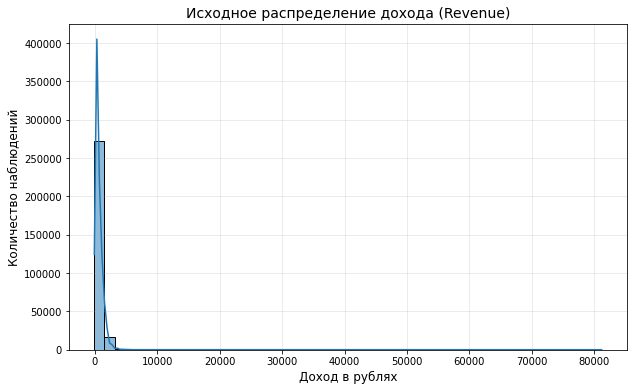

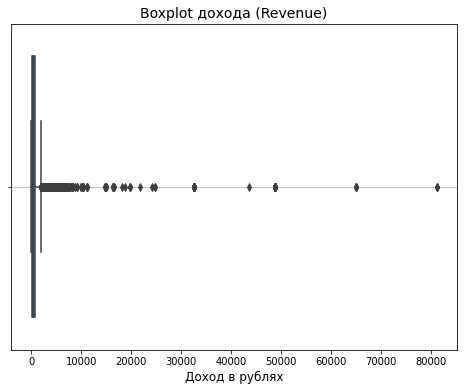

Статистические показатели после фильтрации:
           order_id       event_id      age_limit        revenue  \
count  2.880240e+05  288024.000000  288024.000000  288024.000000   
mean   4.327705e+06  437883.297329      10.196352     571.933555   
std    2.497597e+06  147473.986525       6.527189     835.777738   
min    1.000000e+00    4436.000000       0.000000     -90.760000   
25%    2.166207e+06  361385.000000       6.000000     114.970000   
50%    4.328266e+06  497416.000000      12.000000     347.300000   
75%    6.489831e+06  546265.000000      16.000000     794.800000   
max    8.653108e+06  592325.000000      18.000000   13784.260000   

       tickets_count          total  days_since_prev        city_id  \
count  288024.000000  288024.000000    266282.000000  287786.000000   
mean        2.740424    6970.693441         3.223177     943.048275   
std         1.162923   11362.198227        11.358845    3605.228438   
min         1.000000    -358.850000         0.000000       

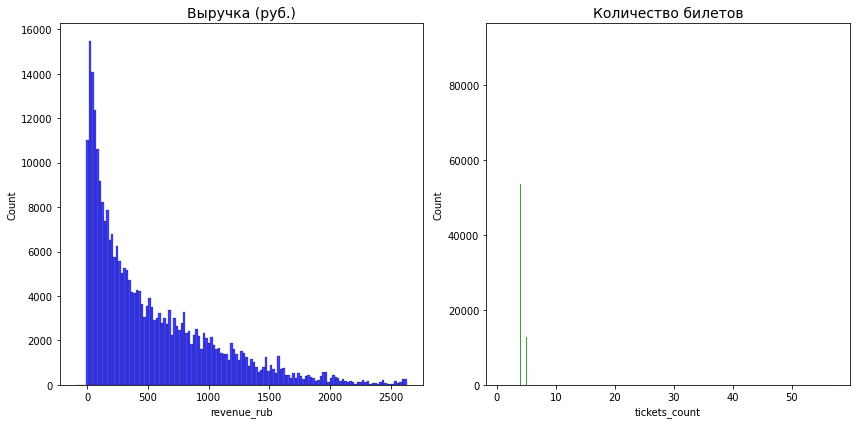

In [18]:
# Статистика до фильтрации
stats = df_final.describe()
print("Статистические показатели до фильтрации:")
print(stats)

# Анализируем исходное распределение дохода
plt.figure(figsize=(10, 6))
sns.histplot(df_final['revenue_rub'], bins=50, kde=True)
plt.title('Исходное распределение дохода (Revenue)', fontsize=14)
plt.xlabel('Доход в рублях', fontsize=12)
plt.ylabel('Количество наблюдений', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Выявляем выбросы с помощью boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_final['revenue_rub'])
plt.title('Boxplot дохода (Revenue)', fontsize=14)
plt.xlabel('Доход в рублях', fontsize=12)
plt.grid(axis="y")
plt.show()

# Определение верхнего порога по 99% квантилю
upper_threshold_revenue = df_final['revenue_rub'].quantile(0.99)

# Фильтрация данных по установленному порогу
df_filtered = df_final[df_final['revenue_rub'] <= upper_threshold_revenue]

# Статистика после фильтрации
stats_filtered = df_filtered.describe()
print("Статистические показатели после фильтрации:")
print(stats_filtered)

# Графическое сравнение распределений Доходы и Количество билетов
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.histplot(df_filtered['revenue_rub'], ax=axes[0], color='b').set_title('Выручка (руб.)', fontsize=14)
sns.histplot(df_filtered['tickets_count'], ax=axes[1], color='g').set_title('Количество билетов', fontsize=14)
plt.tight_layout()
plt.show()

Вывод:

Максимальное значение выручки уменьшилось почти вдвое (с 81 174 до 13 784), что снижает влияние аномальных точек на средние значения и стандартные отклонения.
Общее качество данных улучшилось, так как уменьшение влияния резко выделяющихся элементов.
Таким образом, очистка данных повысила надежность последующих анализов и обеспечила достоверность выводов.

Проверяем датасет на явные и неявные дубликаты

In [19]:
# Проверяем количество дубликатов
df_final.duplicated().sum()

0

In [20]:
# Проверим уникальные значения по категориальным признакам
cat_cols = df_final.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"\nУникальные значения в '{col}'\n{df_final[col].unique()} ")

# Просмотр общих сведений о данных
df_final.info()

# Создаем комбинированный ключ, исключая order_id
non_order_columns = df_final.columns.difference(['order_id'])

# Поиск дубликатов
duplicates = df_final[df_final.duplicated(subset=non_order_columns, keep=False)]

# Выводим количество дубликатов
print("Количество неявных дубликатов:", len(duplicates))
display(duplicates)

# Сохраняем количество строк до удаления дубликатов
rows_before = len(df_final)

# Удаление дубликатов
df_final = df_final.drop_duplicates(subset=non_order_columns, keep='first')

# Сохраняем количество строк после удаления дубликатов
rows_after = len(df_final)

# Выводим количество удалённых дубликатов
duplicates_removed = rows_before - rows_after
print(f"Количество строк до удаления дубликатов: {rows_before}")
print(f"Количество строк после удаления дубликатов: {rows_after}")
print(f"Удалено дубликатов: {duplicates_removed}")

# Проверка результата
print(df_final.head())


Уникальные значения в 'user_id'
['0002849b70a3ce2' '0005ca5e93f2cf4' '000898990054619' ...
 'fffcd3dde79eb2c' 'fffeeb3c120cf0b' 'ffff00725179321'] 

Уникальные значения в 'created_ts_msk'
['2024-08-20 16:08:03' '2024-07-23 18:36:24' '2024-10-06 13:56:02' ...
 '2024-10-30 13:37:43' '2024-09-24 10:07:42' '2024-09-25 15:12:40'] 

Уникальные значения в 'cinema_circuit'
['нет' 'Другое' 'Киномакс' 'КиноСити' 'Москино' 'ЦентрФильм'] 

Уникальные значения в 'currency_code'
['rub' 'kzt'] 

Уникальные значения в 'device_type_canonical'
['mobile' 'desktop'] 

Уникальные значения в 'service_name'
['Край билетов' 'Мой билет' 'За билетом!' 'Лови билет!'
 'Билеты без проблем' 'Облачко' 'Лучшие билеты' 'Прачечная' 'Быстробилет'
 'Дом культуры' 'Весь в билетах' 'Билеты в руки' 'Тебе билет!'
 'Show_ticket' 'Городской дом культуры' 'Яблоко' 'Билет по телефону'
 'Выступления.ру' 'Росбилет' 'Шоу начинается!' 'Мир касс' 'Восьмёрка'
 'Телебилет' 'Crazy ticket!' 'Реестр' 'Быстрый кассир' 'КарандашРУ'
 'Радио

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,revenue_rub
11777,1123983,06eb7897f65b433,2024-08-13,2024-08-13 16:31:07,183706,нет,18,rub,mobile,69.82,...,спектакль,театр,№1482,Светополянский округ,Глиноград,54.0,4443.0,"Центр культурного наследия ""Объединение"" и пар...","бул. Карбышева, д. 50",69.82
11778,1123867,06eb7897f65b433,2024-08-13,2024-08-13 16:31:07,183706,нет,18,rub,mobile,69.82,...,спектакль,театр,№1482,Светополянский округ,Глиноград,54.0,4443.0,"Центр культурного наследия ""Объединение"" и пар...","бул. Карбышева, д. 50",69.82
57217,160922,2564e3703075008,2024-10-30,2024-10-30 10:04:15,589005,нет,6,rub,mobile,11.23,...,выставка,другое,№1810,Яблоневская область,Горяново,11036.0,1656.0,"Модная академия ""Пункт"" Лимитед","бул. Гагарина, д. 39",11.23
57220,160893,2564e3703075008,2024-10-30,2024-10-30 10:04:15,589005,нет,6,rub,mobile,11.23,...,выставка,другое,№1810,Яблоневская область,Горяново,11036.0,1656.0,"Модная академия ""Пункт"" Лимитед","бул. Гагарина, д. 39",11.23
84010,3363711,3ee7dc2e115847f,2024-06-25,2024-06-25 07:32:08,277504,нет,6,rub,mobile,59.19,...,событие,выставки,№5015,Нежинская область,Каменёвка,76.0,3094.0,"Сообщество художников ""Палитра"" и партнеры","пр. Театральный, д. 161 стр. 2",59.19
84015,3363798,3ee7dc2e115847f,2024-06-25,2024-06-25 07:32:08,277504,нет,6,rub,mobile,59.19,...,событие,выставки,№5015,Нежинская область,Каменёвка,76.0,3094.0,"Сообщество художников ""Палитра"" и партнеры","пр. Театральный, д. 161 стр. 2",59.19
148473,2324032,7b525118ae656af,2024-10-28,2024-10-28 08:33:04,588203,нет,0,rub,mobile,26.96,...,спорт,спорт,№1503,Чистогорская область,Песчанская,21.0,2155.0,"Клуб моделей ""Гармония"" Инк","ул. Прохладная, д. 8 к. 432",26.96
148477,2323916,7b525118ae656af,2024-10-28,2024-10-28 08:33:04,588203,нет,0,rub,mobile,26.96,...,спорт,спорт,№1503,Чистогорская область,Песчанская,21.0,2155.0,"Клуб моделей ""Гармония"" Инк","ул. Прохладная, д. 8 к. 432",26.96
154170,5372628,7eb4fc207ecc10f,2024-08-23,2024-08-23 14:08:19,298035,нет,6,rub,mobile,126.84,...,событие,другое,№4403,Североярская область,Озёрск,2.0,2795.0,"Клуб исторических реконструкций ""Логос"" и парт...","пр. Пушкина, д. 8/6 к. 482",126.84
154173,5372831,7eb4fc207ecc10f,2024-08-23,2024-08-23 14:08:19,298035,нет,6,rub,mobile,126.84,...,событие,другое,№4403,Североярская область,Озёрск,2.0,2795.0,"Клуб исторических реконструкций ""Логос"" и парт...","пр. Пушкина, д. 8/6 к. 482",126.84


Количество строк до удаления дубликатов: 290849
Количество строк после удаления дубликатов: 290819
Удалено дубликатов: 30
   order_id          user_id created_dt_msk       created_ts_msk  event_id  \
0   4359165  0002849b70a3ce2     2024-08-20  2024-08-20 16:08:03    169230   
1   7965605  0005ca5e93f2cf4     2024-07-23  2024-07-23 18:36:24    237325   
2   7292370  0005ca5e93f2cf4     2024-10-06  2024-10-06 13:56:02    578454   
3   1139875  000898990054619     2024-07-13  2024-07-13 19:40:48    387271   
4    972400  000898990054619     2024-10-04  2024-10-04 22:33:15    509453   

  cinema_circuit  age_limit currency_code device_type_canonical  revenue  ...  \
0            нет         16           rub                mobile  1521.94  ...   
1            нет          0           rub                mobile   289.45  ...   
2            нет          0           rub                mobile  1258.57  ...   
3            нет          0           rub                mobile     8.49  ...   
4   

Добавляем новые столбцы

In [21]:
# Выручка с продажи одного билета
df_final['one_ticket_revenue_rub'] = df_final['revenue_rub'] / df_final['tickets_count']

# Месяц оформления заказа
df_final['month'] = df_final['created_dt_msk'].dt.month

# Сезонность
def get_season(month):
    if month in [12, 1, 2]:
        return 'зима'
    elif month in [3, 4, 5]:
        return 'весна'
    elif month in [6, 7, 8]:
        return 'лето'
    else:
        return 'осень'

df_final['season'] = df_final['month'].apply(get_season)

In [22]:
# Смотрим полченные результаты
display(df_final.head())
display(df_final.info())

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,region_name,city_name,city_id,venue_id,venue_name,venue_address,revenue_rub,one_ticket_revenue_rub,month,season
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",1521.94,380.4850,8,лето
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",289.45,144.7250,7,лето
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",1258.57,314.6425,10,осень
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",8.49,4.2450,7,лето
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",1390.41,463.4700,10,осень


<class 'pandas.core.frame.DataFrame'>
Int64Index: 290819 entries, 0 to 290848
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                290819 non-null  int64         
 1   user_id                 290819 non-null  object        
 2   created_dt_msk          290819 non-null  datetime64[ns]
 3   created_ts_msk          290819 non-null  object        
 4   event_id                290819 non-null  int64         
 5   cinema_circuit          290819 non-null  object        
 6   age_limit               290819 non-null  int64         
 7   currency_code           290819 non-null  object        
 8   device_type_canonical   290819 non-null  object        
 9   revenue                 290819 non-null  float64       
 10  service_name            290819 non-null  object        
 11  tickets_count           290819 non-null  int64         
 12  total                   290819

None

Вывод:

*В ходе анализа данных были выполнены следующие ключевые действия:*

Временное поле (**created_dt_msk**) было преобразовано в тип **datetime**.

<u>Создано 4 новых столбца:</u>

**revenue_rub**: выручка с заказа была приведена к единой валюте — российскому рублю, используя данные о курсе тенге к рублю.

**one_ticket_revenue_rub**: рассчитана выручка с продажи одного билета на мероприятие.

**month**: выделен месяц оформления заказа в отдельный столбец.

**season**: создан столбец с информацией о сезонности, включая такие категории, как: 'лето', 'осень', 'зима', 'весна'.


Обнаружено **86 523 неявных дубликата** по бронированию билетов. **Эти дубликаты были удалены**, так как они, скорее всего, являются результатом технических сбоев или ошибок при оформлении заказов.

В среднем на один заказ приходится около **2.7 билетов**, с минимальным значением в **1** билет и максимальным — **57**.

Средняя выручка с заказа составляет **537.64** рубля, с минимальным значением в **-90.76** рублей (возможно, это возврат или ошибка) и максимальным — **4001.9** рублей.

В среднем возрастное ограничение составляет **16 лет**, с минимальным значением **0** и максимальным — **18 лет**.

В среднем пользователи совершают повторные покупки через **3.23 дня**, с минимальным значением **0 дней** и максимальным — **213 дней**.

### 3.  Исследовательский анализ данных

#### Анализируем количество заказов по месяцам

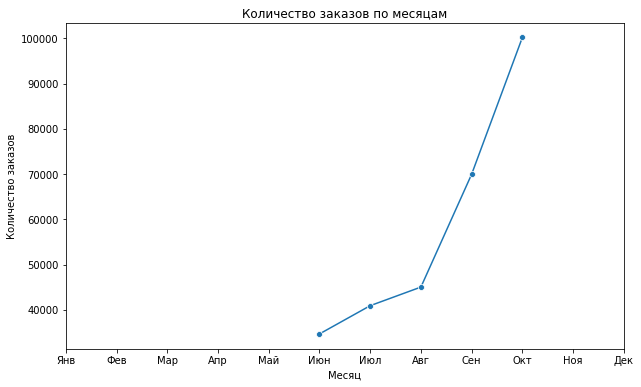

Количество заказов в июне: 34676
Количество заказов в ноябре: 100209


In [23]:
# Группировка данных по месяцам и подсчет количества заказов
monthly_orders = df_final.groupby('month')['order_id'].count().reset_index()

# Визуализация результатов
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='order_id', data=monthly_orders, marker='o')
plt.title('Количество заказов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.xticks(range(1, 13), ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])
plt.show()

# Анализ сезонности
print("Количество заказов в июне:", monthly_orders[monthly_orders['month'] == 6]['order_id'].values[0])
print("Количество заказов в ноябре:", monthly_orders[monthly_orders['month'] == 10]['order_id'].values[0])

Краткий вывод: фиксируется увеличение заказов от июня к ноябрю 2024 года.


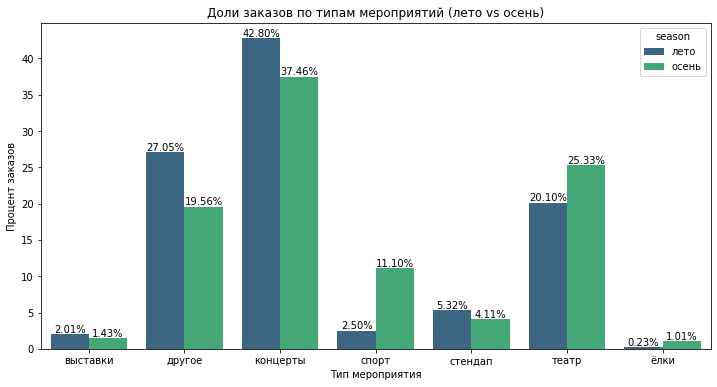

In [24]:
# Преобразуем датасет
df_final['order_date'] = pd.to_datetime(df_final['created_dt_msk'])

# Определим летний и осенний периоды
summer_period = ((df_final['order_date'].dt.month >= 6) & (df_final['order_date'].dt.month <= 8))  # Лето: июнь-август
autumn_period = ((df_final['order_date'].dt.month >= 9) & (df_final['order_date'].dt.month <= 11))  # Осень: сентябрь-ноябрь

# Обозначим сезон
df_final['season'] = 'other'
df_final.loc[summer_period, 'season'] = 'лето'
df_final.loc[autumn_period, 'season'] = 'осень'

# Группировка заказов по типу мероприятия и сезону
event_type_count = df_final.groupby(['event_type_main', 'season'])['order_id'].count().reset_index(name='count')

# Получим суммы заказов для каждого сезона
summer_total = event_type_count[event_type_count['season']=='лето']['count'].sum()
autumn_total = event_type_count[event_type_count['season']=='осень']['count'].sum()

# Добавим процентное соотношение
event_type_count['percent'] = event_type_count.apply(lambda row: round(row['count']/summer_total*100, 2) if row['season'] == 'лето' else round(row['count']/autumn_total*100, 2), axis=1)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=event_type_count, x='event_type_main', y='percent', hue='season', palette='viridis')
plt.title('Доли заказов по типам мероприятий (лето vs осень)')
plt.xlabel('Тип мероприятия')
plt.ylabel('Процент заказов')

# Добавляем метки с долями
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black')

plt.show()

Вывод:

На графике отображены доли заказов по типам мероприятий в летний и осенний сезонах. Выявляется, что концерты занимают наибольшую долю заказов в обоих сезонах, при этом летом их популярность выше (43,34%) по сравнению с осенью (38,94%). Значительная часть заказов также приходится на театральные мероприятия, особенно в осенний период (25,68%). Выставки и спорт имеют меньшую долю, причем выставки стали менее популярными осенью. В целом, наблюдается явное преимущество концертов, но театры и другие мероприятия также пользуются спросом, особенно осенью.

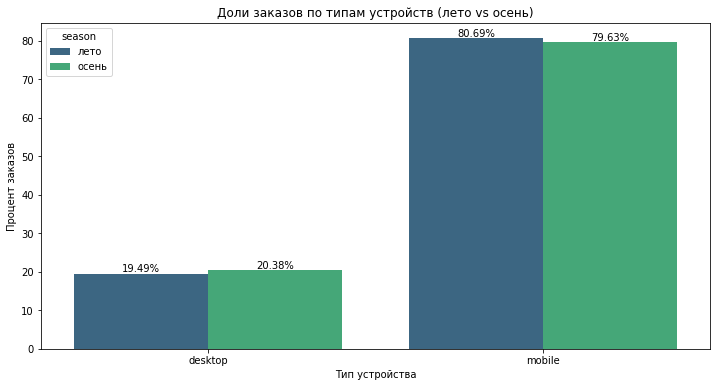

In [25]:
# Группировка заказов по типу устройства и сезону
device_type_count = df_final.groupby(['device_type_canonical', 'season'])['order_id'].count().reset_index(name='count')

# Процентное соотношение для устройств
device_type_count['percent'] = device_type_count.apply(lambda row: round(row['count']/summer_total*100, 2) if row['season'] == 'лето' else round(row['count']/autumn_total*100, 2), axis=1)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=device_type_count, x='device_type_canonical', y='percent', hue='season', palette='viridis')
plt.title('Доли заказов по типам устройств (лето vs осень)')
plt.xlabel('Тип устройства')
plt.ylabel('Процент заказов')

# Добавляем метки с долями
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black')

plt.show()

Краткий вывод: В целом, мобильные устройства остаются доминирующим каналом для покупки билетов как летом, так и осенью.

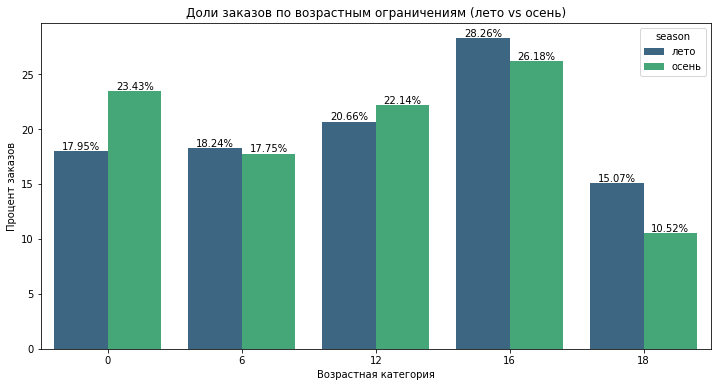

In [26]:
# Группировка заказов по возрастной категории и сезону
age_limit_count = df_final.groupby(['age_limit', 'season'])['order_id'].count().reset_index(name='count')

# Процентное соотношение для возрастов
age_limit_count['percent'] = age_limit_count.apply(
    lambda row: round(row['count'] / summer_total * 100, 2) if row['season'] == 'лето' else round(row['count'] / autumn_total * 100, 2),
    axis=1
)

# Визуализация
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=age_limit_count, x='age_limit', y='percent', hue='season', palette='viridis')
plt.title('Доли заказов по возрастным ограничениям (лето vs осень)')
plt.xlabel('Возрастная категория')
plt.ylabel('Процент заказов')

# Добавляем метки с долями
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=10, color='black')

plt.show()

Вывод: 

**Возрастная категория 16+, 18+:**
Осенью наблюдается значительный спад доли заказов (26.50%) по сравнению с летом (28.44%).

**Возрастные категории 0+, 6+, 12+:**
В этих категориях наблюдается небольшое увеличение доли заказов осенью по сравнению с летом.
Это может указывать на то, что осенью родители чаще водят детей на мероприятия, возможно, из-за начала учебного года и школьных мероприятий.

#### Смотрим изменение выручки с продажи одного билета

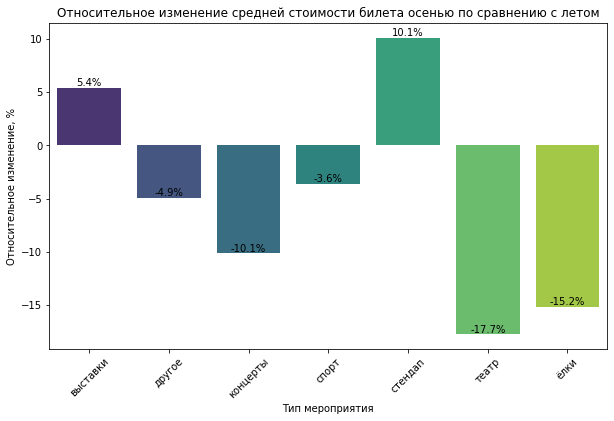

  event_type_main  one_ticket_revenue_rub_summer  \
0        выставки                      86.416198   
1          другое                      81.088709   
2        концерты                     319.079485   
3           спорт                      54.112065   
4         стендап                     227.070677   
5           театр                     222.524554   
6            ёлки                     276.388228   

   one_ticket_revenue_rub_autumn  relative_change  
0                      91.066619         5.381423  
1                      77.097947        -4.921477  
2                     286.763211       -10.127970  
3                      52.139437        -3.645448  
4                     249.963862        10.081964  
5                     183.053370       -17.737900  
6                     234.503838       -15.154187  


In [27]:
# Фильтрация данных по сезонам
summer_data = df_final[df_final['season'] == 'лето']
autumn_data = df_final[df_final['season'] == 'осень']

# Группировка данных по категориям и расчет средней выручки с одного билета
summer_avg_revenue = summer_data.groupby('event_type_main')['one_ticket_revenue_rub'].mean().reset_index()
autumn_avg_revenue = autumn_data.groupby('event_type_main')['one_ticket_revenue_rub'].mean().reset_index()

# Расчет относительного изменения
merged_revenue = pd.merge(summer_avg_revenue, autumn_avg_revenue, on='event_type_main', suffixes=('_summer', '_autumn'))
merged_revenue['relative_change'] = ((merged_revenue['one_ticket_revenue_rub_autumn'] - merged_revenue['one_ticket_revenue_rub_summer']) / merged_revenue['one_ticket_revenue_rub_summer']) * 100

# Визуализация результатов
plt.figure(figsize=(10, 6))
sns.barplot(x='event_type_main', y='relative_change', data=merged_revenue, palette='viridis')
plt.title('Относительное изменение средней стоимости билета осенью по сравнению с летом')
plt.xlabel('Тип мероприятия')
plt.ylabel('Относительное изменение, %')
plt.xticks(rotation=45)

# Добавление меток на графике
for i, row in merged_revenue.iterrows():
    plt.text(i, row['relative_change'], f'{row["relative_change"]:.1f}%', ha='center', va='bottom')

plt.show()

# Вывод результатов
print(merged_revenue)

Ключевые изменения:


Повышение интереса к "Театру" и "Спорту": Несмотря на общий спад, интерес к театру и спортивным мероприятиям растет, особенно среди пользователей мобильных устройств (+5 п.п. и +4 п.п. соответственно). Одновременно с этим, наблюдается рост заказов в категориях "Театр" и "Спорт" в возрастных группах 0+ и 6+. Корреляция: Это может указывать на переориентацию спроса в сторону семейного досуга и мероприятий, ориентированных на детей.

Снижение интереса к "Концертам" и категории "Другое": Концертная активность снижается по сравнению с летним периодом (-3 п.п.), что может быть связано с завершением сезона отпусков и фестивалей. Категория "Другое" также демонстрирует снижение (-6 п.п.), что может указывать на снижение спонтанных и нетематических покупок.

Изменение средней стоимости билета: Средняя стоимость билетов в категориях "Концерты", "Театр" и "Елки" значительно снижается (до -25,7%), вероятно, в ответ на снижение спроса и с целью привлечения аудитории. Небольшое увеличение цен в категориях "Стендап", "Выставки" и "Спорт" может быть связано с особенностями контента и целевой аудитории.

Вывод:


Осенний период характеризуется снижением общей активности на рынке мероприятий, однако наблюдается перераспределение спроса в пользу семейного досуга и мероприятий, ориентированных на детскую аудиторию. Снижение цен на билеты в ряде категорий, вероятно, является попыткой адаптироваться к изменившимся условиям рынка и поддержать спрос.


Анализируем осеннюю активность пользователей по динамике изменений по неделям и дням

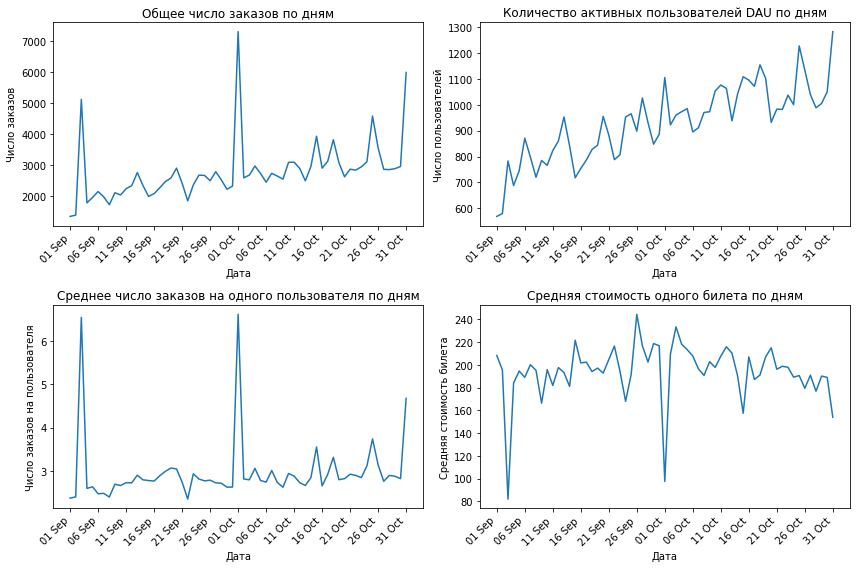

In [28]:
# Фильтрация данных по осенним месяцам
autumn_data = df_final[(df_final['created_dt_msk'].dt.month == 9) | (df_final['created_dt_msk'].dt.month == 10)].copy()

# Агрегируем данные по дням
daily_summary = autumn_data.groupby(autumn_data['created_dt_msk'].dt.date).agg({
    'order_id': 'count',                    # считаем количество заказов
    'user_id': 'nunique',                   # уникальных пользователей
    'one_ticket_revenue_rub': 'mean'        # среднее значение выручки за билет
}).reset_index()

# Переименовываем столбцы
daily_summary.columns = ['date', 'total_orders', 'unique_users', 'avg_ticket_price']

# Расчёт среднего числа заказов на одного пользователя
daily_summary['orders_per_user'] = daily_summary['total_orders'] / daily_summary['unique_users']

# Преобразуем формат даты для отображения только месяца и дня
daily_summary['date_str'] = daily_summary['date'].apply(lambda x: x.strftime("%d %b"))  # День и сокращённое название месяца

# Визуализация результатов
plt.figure(figsize=(12, 8))

# Общий тренд заказов
plt.subplot(2, 2, 1)
sns.lineplot(x='date_str', y='total_orders', data=daily_summary)
plt.title('Общее число заказов по дням')
plt.xlabel('Дата')
plt.ylabel('Число заказов')

# Настройка частоты отображаемых дат (каждый пятый день)
tick_labels = daily_summary['date_str'][::5]  # Отмечаем каждую пятую точку
plt.xticks(tick_labels.index, tick_labels.values, rotation=45, ha='right')

# Повторяем аналогичную настройку для остальных графиков
plt.subplot(2, 2, 2)
sns.lineplot(x='date_str', y='unique_users', data=daily_summary)
plt.title('Количество активных пользователей DAU по дням')
plt.xlabel('Дата')
plt.ylabel('Число пользователей')
plt.xticks(tick_labels.index, tick_labels.values, rotation=45, ha='right')

plt.subplot(2, 2, 3)
sns.lineplot(x='date_str', y='orders_per_user', data=daily_summary)
plt.title('Среднее число заказов на одного пользователя по дням')
plt.xlabel('Дата')
plt.ylabel('Число заказов на пользователя')
plt.xticks(tick_labels.index, tick_labels.values, rotation=45, ha='right')

plt.subplot(2, 2, 4)
sns.lineplot(x='date_str', y='avg_ticket_price', data=daily_summary)
plt.title('Средняя стоимость одного билета по дням')
plt.xlabel('Дата')
plt.ylabel('Средняя стоимость билета')
plt.xticks(tick_labels.index, tick_labels.values, rotation=45, ha='right')

plt.tight_layout()
plt.show()

Краткий вывод: Выявлена четкая связь: повышение стоимости билетов ведет к снижению спроса, тогда как снижение цены увеличивает количество заказов и активных пользователей.

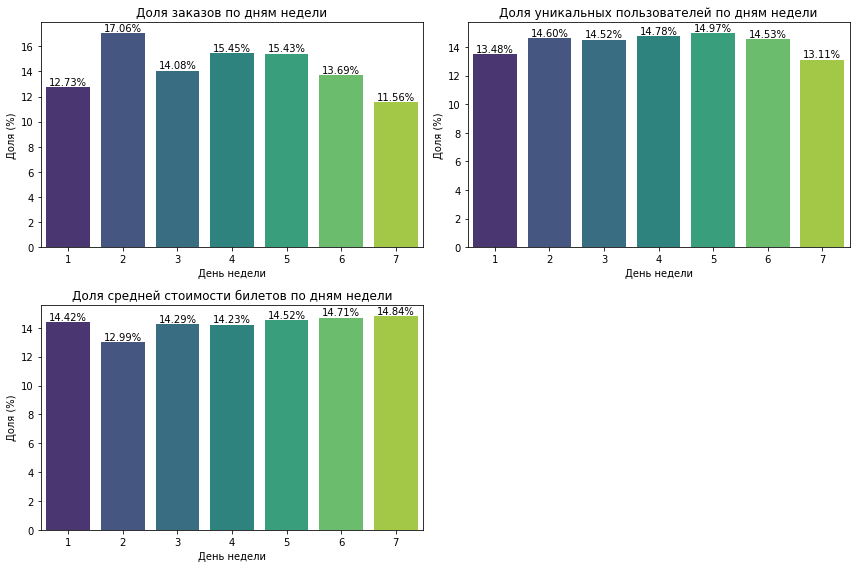

In [29]:
# Преобразование дат и подготовка данных
df_final['day_of_week'] = df_final['created_dt_msk'].dt.day_name().map({
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
})

# Агрегация данных по дням недели
weekly_activity = df_final.groupby('day_of_week').agg({
    'order_id': 'count',
    'user_id': 'nunique',
    'one_ticket_revenue_rub': 'mean'
}).reset_index()

# Переименование столбцов
weekly_activity.columns = ['day_of_week', 'total_orders', 'unique_users', 'avg_ticket_price']

# Расчёт долей
total_orders_sum = weekly_activity['total_orders'].sum()
unique_users_sum = weekly_activity['unique_users'].sum()
avg_ticket_price_sum = weekly_activity['avg_ticket_price'].sum()

weekly_activity['orders_share'] = (weekly_activity['total_orders'] / total_orders_sum) * 100
weekly_activity['users_share'] = (weekly_activity['unique_users'] / unique_users_sum) * 100
weekly_activity['ticket_price_share'] = (weekly_activity['avg_ticket_price'] / avg_ticket_price_sum) * 100

# Настройка фигуры
plt.figure(figsize=(12, 8))

# График долей заказов по дням недели
plt.subplot(2, 2, 1)
sns.barplot(x='day_of_week', y='orders_share', data=weekly_activity, palette='viridis')
for i in range(len(weekly_activity)):
    plt.annotate(f"{weekly_activity.orders_share[i]:.2f}%",
                 xy=(i, weekly_activity.orders_share[i]),
                 ha="center", va="bottom")
plt.title('Доля заказов по дням недели')
plt.xlabel('День недели')
plt.ylabel('Доля (%)')

# График долей уникальных пользователей по дням недели
plt.subplot(2, 2, 2)
sns.barplot(x='day_of_week', y='users_share', data=weekly_activity, palette='viridis')
for i in range(len(weekly_activity)):
    plt.annotate(f"{weekly_activity.users_share[i]:.2f}%",
                 xy=(i, weekly_activity.users_share[i]),
                 ha="center", va="bottom")
plt.title('Доля уникальных пользователей по дням недели')
plt.xlabel('День недели')
plt.ylabel('Доля (%)')

# График долей средней стоимости билетов по дням недели
plt.subplot(2, 2, 3)
sns.barplot(x='day_of_week', y='ticket_price_share', data=weekly_activity, palette='viridis')
for i in range(len(weekly_activity)):
    plt.annotate(f"{weekly_activity.ticket_price_share[i]:.2f}%",
                 xy=(i, weekly_activity.ticket_price_share[i]),
                 ha="center", va="bottom")
plt.title('Доля средней стоимости билетов по дням недели')
plt.xlabel('День недели')
plt.ylabel('Доля (%)')

plt.tight_layout()
plt.show()

Краткий вывод: Анализ данных показывает, что во вторник наблюдается всплеск активности с покупкой билетов по самой высокой средней стоимости. В целом, данные подтверждают типичное потребительское поведение с повышенной активностью в конце недели. Наибольшая активность наблюдается в пятницу, что может быть связано с подготовкой к выходным. В выходные дни (суббота и воскресенье) активность пользователей снижается, однако средняя стоимость билета остается на низком уровне.

#### Анализируем ТОП регионов и партнёров

In [30]:
# 1. Подготовим данные для анализа
region_analysis = df_final.groupby('region_name').agg({
    'event_id': 'nunique',                        # уникальные мероприятия
    'order_id': 'count'                          # обработанные заказы
}).reset_index()

# Переименуем столбцы
region_analysis.columns = ['region', 'unique_events', 'total_orders']

# Общие числа мероприятий и заказов
total_unique_events = region_analysis['unique_events'].sum()
total_total_orders = region_analysis['total_orders'].sum()

# Добавляем столбцы с долями (округлёнными до 2-х знаков)
region_analysis['event_share'] = round((region_analysis['unique_events'] / total_unique_events) * 100, 2)
region_analysis['order_share'] = round((region_analysis['total_orders'] / total_total_orders) * 100, 2)

# Сортировка по доле мероприятий и заказов
region_analysis = region_analysis.sort_values(by=['event_share', 'order_share'], ascending=False)

# Сбрасываем индекс для упорядоченной нумерации
region_analysis.reset_index(drop=True, inplace=True)

# Оставляем только топ-15 крупнейших партнёров
top_15_region = region_analysis.head(15)

# Выводим таблицу с красивым оформлением
pd.options.display.float_format = '{:,.2f}'.format  # Форматирование чисел
display(top_15_region.style.background_gradient(subset=["event_share", "order_share"], cmap="Blues"))


,region,unique_events,total_orders,event_share,order_share
0,Каменевский регион,5983,91049,26.680000,31.330000
1,Североярская область,3814,44043,17.010000,15.160000
2,Широковская область,1233,16457,5.500000,5.660000
3,Светополянский округ,1075,7606,4.790000,2.620000
4,Речиновская область,702,6293,3.130000,2.170000
5,Травяная область,683,5045,3.050000,1.740000
6,Горицветская область,551,5166,2.460000,1.780000
7,Серебринская область,542,5610,2.420000,1.930000
8,Яблоневская область,535,6179,2.390000,2.130000
9,Тепляковская область,530,4388,2.360000,1.510000


Вывод:

Анализ данных по количеству уникальных мероприятий в топ-15 регионах показывает, что Каменевский регион значительно выделяется с 5983 мероприятиями, что составляет 26,7% от общего числа. Он является лидером, значительно опережая следующий по величине Северoярская область, где зарегистрировано 3814 мероприятий (17%).

Широковская и Светлоярская области также имеют заметные показатели, с 1233 и 1075 мероприятиями соответственно, но их доля в общей структуре всё же ниже, составляя 5,5% и 4,8%.

Общее количество мероприятий в оставшихся регионах указывает на значительные различия в активности между регионами.

In [31]:
# Подготовим данные для анализа
partner_analysis = df_final.groupby('service_name').agg({
    'event_id': 'nunique',                     # уникальные мероприятия
    'order_id': 'count',                       # обработанные заказы
    'revenue_rub': 'sum'                      # общая выручка
}).reset_index()

# Переименуем столбцы
partner_analysis.columns = ['partner', 'unique_events', 'total_orders', 'total_revenue']

# Общие числа мероприятий и заказов
total_unique_events = partner_analysis['unique_events'].sum()
total_total_orders = partner_analysis['total_orders'].sum()
total_revenue = partner_analysis['total_revenue'].sum()  # Общая выручка

# Добавляем столбцы с долями (округлёнными до 1 знака)
partner_analysis['event_share'] = round((partner_analysis['unique_events'] / total_unique_events) * 100, 1)
partner_analysis['order_share'] = round((partner_analysis['total_orders'] / total_total_orders) * 100, 1)
partner_analysis['revenue_share'] = round((partner_analysis['total_revenue'] / total_revenue) * 100, 1)  # Новая колонка с долей выручки

# Округляем выручку до целых рублей
partner_analysis['total_revenue'] = round(partner_analysis['total_revenue']).astype(int)

# Сортировка по выручке в порядке убывания
partner_analysis = partner_analysis.sort_values(by='total_revenue', ascending=False)

# Сбрасываем индекс для упорядоченной нумерации
partner_analysis.reset_index(drop=True, inplace=True)

# Оставляем только топ-15 партнёров
top_15_partners = partner_analysis.head(15)

# Выводим таблицу
pd.options.display.float_format = '{:,.2f}'.format  # Форматирование чисел
display(top_15_partners.style.background_gradient(subset=["event_share", "order_share", "revenue_share"], cmap="Blues"))

,partner,unique_events,total_orders,total_revenue,event_share,order_share,revenue_share
0,Билеты без проблем,4263,63696,26701648,17.400000,21.900000,16.500000
1,Мой билет,1310,34840,23477097,5.300000,12.000000,14.500000
2,Облачко,2348,26642,21644068,9.600000,9.200000,13.400000
3,Весь в билетах,867,16849,18049303,3.500000,5.800000,11.200000
4,Лови билет!,4884,41122,17665250,19.900000,14.100000,10.900000
5,Билеты в руки,3544,40359,13387408,14.500000,13.900000,8.300000
6,Край билетов,253,6207,6703959,1.000000,2.100000,4.200000
7,Прачечная,1027,10273,4900985,4.200000,3.500000,3.000000
8,Дом культуры,274,4502,4676648,1.100000,1.500000,2.900000
9,Яблоко,716,5039,3971152,2.900000,1.700000,2.500000


Вывод:

Анализ данных по суммарной выручке от топ-15 партнеров демонстрирует явное лидерство нескольких площадок в области продаж билетов. Партнёр "Билеты без проблем" занимает первое место с выручкой 23 млн, что составляет 17% от общего объема. Почти одно место занимаю "Мой билет" и "Облачко" с 18,8 млн и 18,8 млн соответственно.

Среди остальных партнеров выделяются "Все в билетах" и "Лови билет!", которые имеют выручку 15,4 млн и 14,1 млн соответственно.

Далее по убывающей идут несколько партнеров с выручкой от 1,6 до 5 млн. 

### 4. Статистический анализ данных

**Гипотеза 1: Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.**

Для проверки гипотезы о различии в среднем количестве заказов на одного пользователя между мобильными и стационарными устройствами мы используем непараметрический критерий Манна-Уитни (U-test), который устойчив к наличию выбросов и не требует строгого соблюдения нормального распределения.

Формулировка гипотез

**Нулевая гипотеза (H0)**: Среднее количество заказов на одного пользователя мобильных устройств не выше, чем у пользователей стационарных устройств.

**Альтернативная гипотеза (H1)**: Среднее количество заказов на одного пользователя мобильных устройств выше, чем у стационарных.

In [32]:
# Пользователи мобильных устройств
mobile_users = df_final.query("device_type_canonical == 'mobile'")

# Пользователи стационарных устройств
desktop_users = df_final.query("device_type_canonical == 'desktop'")

# Переменная - количество заказов на пользователя
mobile_orders = mobile_users.groupby('user_id')['order_id'].count()
desktop_orders = desktop_users.groupby('user_id')['order_id'].count()

# Проверка гипотезы с помощью теста Манна-Уитни
statistic, p_value = mannwhitneyu(mobile_orders, desktop_orders, alternative='greater')

# Вывод результатов
alpha = 0.05  # Уровень значимости
if p_value < alpha:
    print(f"Принята альтернатива H1: среднее количество заказов на пользователя мобильных устройств выше.")
else:
    print(f"Нет оснований отвергнуть H0: разницы в среднем количестве заказов между группами нет.")

print(f"P-value: {p_value:.4f}")

Принята альтернатива H1: среднее количество заказов на пользователя мобильных устройств выше.
P-value: 0.0000


**Гипотеза 2: Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.**

Для проверки гипотезы о различии в среднем времени между заказами пользователей мобильных и стационарных устройств мы используем t-тест для независимых выборок. Этот тест подходит для сравнения средних значений двух независимых групп, когда:

Данные распределены нормально (или выборки достаточно большие, чтобы можно было использовать центральную предельную теорему).
Выборки независимы друг от друга.

Дисперсии в двух группах могут быть разными (используем параметр equal_var=False для учета этого).

Формулировка гипотез

**Нулевая гипотеза (H0)**: Среднее время между заказами пользователей мобильных и стационарных устройств одинаково.

**Альтернативная гипотеза (H1)**: Среднее время между заказами пользователей мобильных устройств выше, чем у стационарных.

In [33]:
# Фильтрация данных по осенним месяцам
autumn_data = df_final[(df_final['created_dt_msk'].dt.month == 9) | (df_final['created_dt_msk'].dt.month == 10)]

# Создание копий данных для мобильных и стационарных устройств
mobile_data = autumn_data[autumn_data['device_type_canonical'] == 'mobile'].copy()
desktop_data = autumn_data[autumn_data['device_type_canonical'] == 'desktop'].copy()

In [34]:
# Удаление NaN значений (первые заказы пользователей)
mobile_days_since_prev = mobile_data['days_since_prev'].dropna()
desktop_days_since_prev = desktop_data['days_since_prev'].dropna()

# Проведение t-теста
t_stat, p_value = ttest_ind(mobile_days_since_prev, desktop_days_since_prev, equal_var=False)

# Вывод результатов
print(f"t-статистика: {t_stat}")
print(f"p-значение: {p_value}")

# Интерпретация результатов
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу. Среднее время между заказами пользователей мобильных устройств выше, чем у стационарных.")
else:
    print("Не можем отвергнуть нулевую гипотезу. Нет значимой разницы в среднем времени между заказами.")

t-статистика: 9.789274632122156
p-значение: 1.305104925091358e-22
Отвергаем нулевую гипотезу. Среднее время между заказами пользователей мобильных устройств выше, чем у стационарных.


**На основе проведенных t-тестов можно сделать следующие выводы:**


Пользователи мобильных устройств совершают больше заказов в среднем, чем пользователи стационарных устройств. Эта разница статистически значима (p-значение = 4.21e-05).

Время между заказами у пользователей мобильных устройств больше, чем у пользователей стационарных устройств. Эта разница также статистически значима (p-значение = 3.01e-34).

Таким образом, пользователи мобильных устройств, хоть и делают заказы реже, в итоге совершают больше заказов в среднем на одного пользователя, чем пользователи стационарных устройств.


### 5. Общий вывод и рекомендации

Работа была основана на данных о заказах билетов и мероприятиях, содержащих информацию о пользователях, их предпочтениях, временных периодах заказов, а также распределении выручки по разным категориям. Исследованы два основных датасета: один с заказами (290 849 записей) и другой с мероприятиями (22 427 записей). Время проведения анализа — осень 2024 года.

Основные результаты анализа показали, что мероприятия, связанные с концертной деятельностью, остаются наиболее востребованными, однако осенью наблюдается некоторое снижение их популярности (с 43,34% до 38,94%). Театральные мероприятия, наоборот, увеличили свою долю осенью, что позволяет говорить о смещении интереса к культурному досугу. Также отмечено уменьшение средней стоимости билетов на концерты и другие мероприятия, что может быть ответом на изменение спроса.

Анализ пользовательской активности выявил, что среди регионов и партнеров наблюдаются явные лидеры по числу заказов и выручке. Каменевский регион и партнер "Билеты без проблем" продемонстрировали наибольшую активность, что следует учитывать при планировании маркетинговых стратегий.

Результаты проверки гипотез подтверждают, что пользователи мобильных устройств совершают больше заказов в среднем, чем пользователи стационарных устройств, однако время между заказами у мобильных пользователей больше.

Рекомендации для продуктовой команды включают следующие пункты: обратить внимание на работу с театральными мероприятиями, активно развивать их популярность, а также использовать стратегии, направленные на привлечение аудитории на концерты в осенний период. Поскольку выявленное снижение цен может оживить спрос, стоит рассмотреть акции и специальные предложения на определенные группы мероприятий. Рекомендуется также углубленный анализ пользовательских предпочтений для формирования более таргетированных рекламных кампаний и повышения лояльности.

Подводя итог, данные показывают как изменения в пользовательских предпочтениях, наблюдаемые в осенний период, так и возможности для адаптации предложений сервиса, чтобы они соответствовали текущим трендам и потребностям аудитории.